In [3]:
"""
Getting image coordinates from a nearby set of coordinates
"""

# Importing mapillary
import mapillary.interface as mly
import mapillary.utils as mlu
# JSON import
import json

mlu.auth.set_token("MLY|5261155797330596|84cc24c214184c5aa4b5ce85687734ad")
latitude = 1.3019
longitude = 103.8381

# Get image points close to in the given coordinates
data = mly.get_image_close_to(longitude=longitude, latitude=latitude).to_dict()

# # Save the data as JSON
# file_name = "data/external/get_image_close_to_1.json"
# with open(file_name, mode="w") as f:
#     json.dump(data, f, indent=4)

Requesting GET to https://tiles.mapillary.com/maps/vtp/mly1_public/2/14/12917/8132/?access_token=MLY%7C5261155797330596%7C84cc24c214184c5aa4b5ce85687734ad
Response 200 OK received in 1425ms


In [ ]:
import os
import requests

for point in data["features"]:
    url = mly.image_thumbnail(image_id = point["properties"]["id"], resolution=2048)
    fn = f"data/external/svi_examples/{point['properties']['id']}.jpg"
    print(fn)
    try:
        if not os.path.exists(fn):
            r = requests.get(url)
            with open(fn, 'wb') as f:
                f.write(r.content)
    except Exception as e:
        print('Exception in download_url():', e)

In [17]:
from collections import namedtuple

def create_cityscapes_label_colormap():
    """Creates a label colormap used in CITYSCAPES segmentation benchmark.
    Returns:
        A colormap for visualizing segmentation results.
    """
    # a label and all meta information
    Label = namedtuple( 'Label' , [

        'name'        , # The identifier of this label, e.g. 'car', 'person', ... .
                        # We use them to uniquely name a class

        'id'          , # An integer ID that is associated with this label.
                        # The IDs are used to represent the label in ground truth images
                        # An ID of -1 means that this label does not have an ID and thus
                        # is ignored when creating ground truth images (e.g. license plate).
                        # Do not modify these IDs, since exactly these IDs are expected by the
                        # evaluation server.

        'trainId'     , # Feel free to modify these IDs as suitable for your method. Then create
                        # ground truth images with train IDs, using the tools provided in the
                        # 'preparation' folder. However, make sure to validate or submit results
                        # to our evaluation server using the regular IDs above!
                        # For trainIds, multiple labels might have the same ID. Then, these labels
                        # are mapped to the same class in the ground truth images. For the inverse
                        # mapping, we use the label that is defined first in the list below.
                        # For example, mapping all void-type classes to the same ID in training,
                        # might make sense for some approaches.
                        # Max value is 255!

        'category'    , # The name of the category that this label belongs to

        'categoryId'  , # The ID of this category. Used to create ground truth images
                        # on category level.

        'hasInstances', # Whether this label distinguishes between single instances or not

        'ignoreInEval', # Whether pixels having this class as ground truth label are ignored
                        # during evaluations or not

        'color'       , # The color of this label
        ] )

    labels = [
    #       name                     id    trainId   category            catId     hasInstances   ignoreInEval   color
    Label(  'unlabeled'            ,  0 ,      255 , 'void'            , 0       , False        , True         , (  0,  0,  0) ),
    Label(  'ego vehicle'          ,  1 ,      255 , 'void'            , 0       , False        , True         , (  0,  0,  0) ),
    Label(  'rectification border' ,  2 ,      255 , 'void'            , 0       , False        , True         , (  0,  0,  0) ),
    Label(  'out of roi'           ,  3 ,      255 , 'void'            , 0       , False        , True         , (  0,  0,  0) ),
    Label(  'static'               ,  4 ,      255 , 'void'            , 0       , False        , True         , (  0,  0,  0) ),
    Label(  'dynamic'              ,  5 ,      255 , 'void'            , 0       , False        , True         , (111, 74,  0) ),
    Label(  'ground'               ,  6 ,      255 , 'void'            , 0       , False        , True         , ( 81,  0, 81) ),
    Label(  'road'                 ,  7 ,        0 , 'flat'            , 1       , False        , False        , (128, 64,128) ),
    Label(  'sidewalk'             ,  8 ,        1 , 'flat'            , 1       , False        , False        , (244, 35,232) ),
    Label(  'parking'              ,  9 ,      255 , 'flat'            , 1       , False        , True         , (250,170,160) ),
    Label(  'rail track'           , 10 ,      255 , 'flat'            , 1       , False        , True         , (230,150,140) ),
    Label(  'building'             , 11 ,        2 , 'construction'    , 2       , False        , False        , ( 70, 70, 70) ),
    Label(  'wall'                 , 12 ,        3 , 'construction'    , 2       , False        , False        , (102,102,156) ),
    Label(  'fence'                , 13 ,        4 , 'construction'    , 2       , False        , False        , (190,153,153) ),
    Label(  'guard rail'           , 14 ,      255 , 'construction'    , 2       , False        , True         , (180,165,180) ),
    Label(  'bridge'               , 15 ,      255 , 'construction'    , 2       , False        , True         , (150,100,100) ),
    Label(  'tunnel'               , 16 ,      255 , 'construction'    , 2       , False        , True         , (150,120, 90) ),
    Label(  'pole'                 , 17 ,        5 , 'object'          , 3       , False        , False        , (153,153,153) ),
    Label(  'polegroup'            , 18 ,      255 , 'object'          , 3       , False        , True         , (153,153,153) ),
    Label(  'traffic light'        , 19 ,        6 , 'object'          , 3       , False        , False        , (250,170, 30) ),
    Label(  'traffic sign'         , 20 ,        7 , 'object'          , 3       , False        , False        , (220,220,  0) ),
    Label(  'vegetation'           , 21 ,        8 , 'nature'          , 4       , False        , False        , (107,142, 35) ),
    Label(  'terrain'              , 22 ,        9 , 'nature'          , 4       , False        , False        , (152,251,152) ),
    Label(  'sky'                  , 23 ,       10 , 'sky'             , 5       , False        , False        , ( 70,130,180) ),
    Label(  'person'               , 24 ,       11 , 'human'           , 6       , True         , False        , (220, 20, 60) ),
    Label(  'rider'                , 25 ,       12 , 'human'           , 6       , True         , False        , (255,  0,  0) ),
    Label(  'car'                  , 26 ,       13 , 'vehicle'         , 7       , True         , False        , (  0,  0,142) ),
    Label(  'truck'                , 27 ,       14 , 'vehicle'         , 7       , True         , False        , (  0,  0, 70) ),
    Label(  'bus'                  , 28 ,       15 , 'vehicle'         , 7       , True         , False        , (  0, 60,100) ),
    Label(  'caravan'              , 29 ,      255 , 'vehicle'         , 7       , True         , True         , (  0,  0, 90) ),
    Label(  'trailer'              , 30 ,      255 , 'vehicle'         , 7       , True         , True         , (  0,  0,110) ),
    Label(  'train'                , 31 ,       16 , 'vehicle'         , 7       , True         , False        , (  0, 80,100) ),
    Label(  'motorcycle'           , 32 ,       17 , 'vehicle'         , 7       , True         , False        , (  0,  0,230) ),
    Label(  'bicycle'              , 33 ,       18 , 'vehicle'         , 7       , True         , False        , (119, 11, 32) ),
    Label(  'license plate'        , -1 ,       -1 , 'vehicle'         , 7       , False        , True         , (  0,  0,142) ),
    ]
    return labels

In [24]:
import torch
import torchvision.transforms as T
from PIL import Image, ImageEnhance
import numpy as np
import torchvision.models as models

def segment_image(image_path, model, device):
    img = Image.open(image_path)
    transform = T.Compose([
        T.Resize((1024, 2048)),
        T.ToTensor()#,
        # T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])
    input_img = transform(img).unsqueeze(0).to(device)
    output = model(input_img)['out'][0].argmax(0).byte().cpu().numpy()
    return output.astype('uint8')

def overlay_images(image1, image2, alpha):
    blended_img = Image.blend(image1, image2, alpha)
    return blended_img


device = torch.device('cuda' if torch.cuda.is_available() else 'mps')
model = models.segmentation.deeplabv3_resnet50(pretrained=True, progress=True)
model.eval()
model.to(device)

image_path = 'data/external/svi_examples/365237318245343.jpg'
labels = create_cityscapes_label_colormap()
original_img = Image.open(image_path).resize((2048, 1024))
segmented_img = segment_image(image_path, model, device)
# Finally we visualize the prediction
color_seg = np.zeros((segmented_img.shape[0], segmented_img.shape[1], 3), dtype=np.uint8)
unique_id_array = np.unique(segmented_img)
for unique_id in unique_id_array:
    label = list(filter(lambda label: label.trainId == unique_id, labels))[0]
                        # give color to color_seg
    color_seg[segmented_img == unique_id, :] = label.color
# segmented_img_color.putpalette([
#     128, 64, 128,  # Road
#     70, 70, 70,  # Sidewalk
#     153, 153, 153,  # Building
#     107, 142, 35,  # Vegetation
#     70, 130, 180,  # Sky
#     220, 20, 60,  # Person
#     255, 0, 0,  # Car
#     0, 0, 142,  # Truck
#     # Add more colors if necessary
# ])
color_seg = Image.fromarray(color_seg)
segmented_img_color = color_seg.resize((2048, 1024), Image.NEAREST)

alpha = 0.5
overlay = overlay_images(original_img, segmented_img_color, alpha)
overlay.show()



/Users/koichiito/opt/anaconda3/envs/vis_review/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/koichiito/opt/anaconda3/envs/vis_review/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DeepLabV3_ResNet50_Weights.COCO_WITH_VOC_LABELS_V1`. You can also use `weights=DeepLabV3_ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [32]:
import torch
import torchvision.transforms as T
from PIL import Image, ImageEnhance
import numpy as np
import torchvision.models as models

def segment_image(image_path, model, device):
    img = Image.open(image_path)
    transform = T.Compose([
        T.Resize((1024, 2048)),
        T.ToTensor(),
        T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])
    input_img = transform(img).unsqueeze(0).to(device)
    output = model(input_img)['out'][0].argmax(0).byte().cpu().numpy()
    return output.astype('uint8')

def label_to_color_image(label_image):
    labels = create_cityscapes_label_colormap()
    color_image = np.zeros((label_image.shape[0], label_image.shape[1], 3), dtype=np.uint8)
    for label in labels:
        color_image[label_image == label.id] = label.color
    return color_image

def overlay_images(image1, image2, alpha):
    blended_img = Image.blend(image1, image2, alpha)
    return blended_img


device = torch.device('cuda' if torch.cuda.is_available() else 'mps')
model = models.segmentation.deeplabv3_resnet50(pretrained=True, progress=True)
model.eval()
model.to(device)

image_path = 'data/external/svi_examples/365237318245343.jpg'

original_img = Image.open(image_path).resize((2048, 1024))
segmented_img = segment_image(image_path, model, device)
segmented_img_color = Image.fromarray(label_to_color_image(segmented_img), 'RGB')
segmented_img_color = segmented_img_color.resize((2048, 1024), Image.NEAREST)
# segmented_img_color = segmented_img_color.convert('RGBA')

alpha = 0.5
overlay = overlay_images(original_img, segmented_img_color, alpha)
overlay.show()


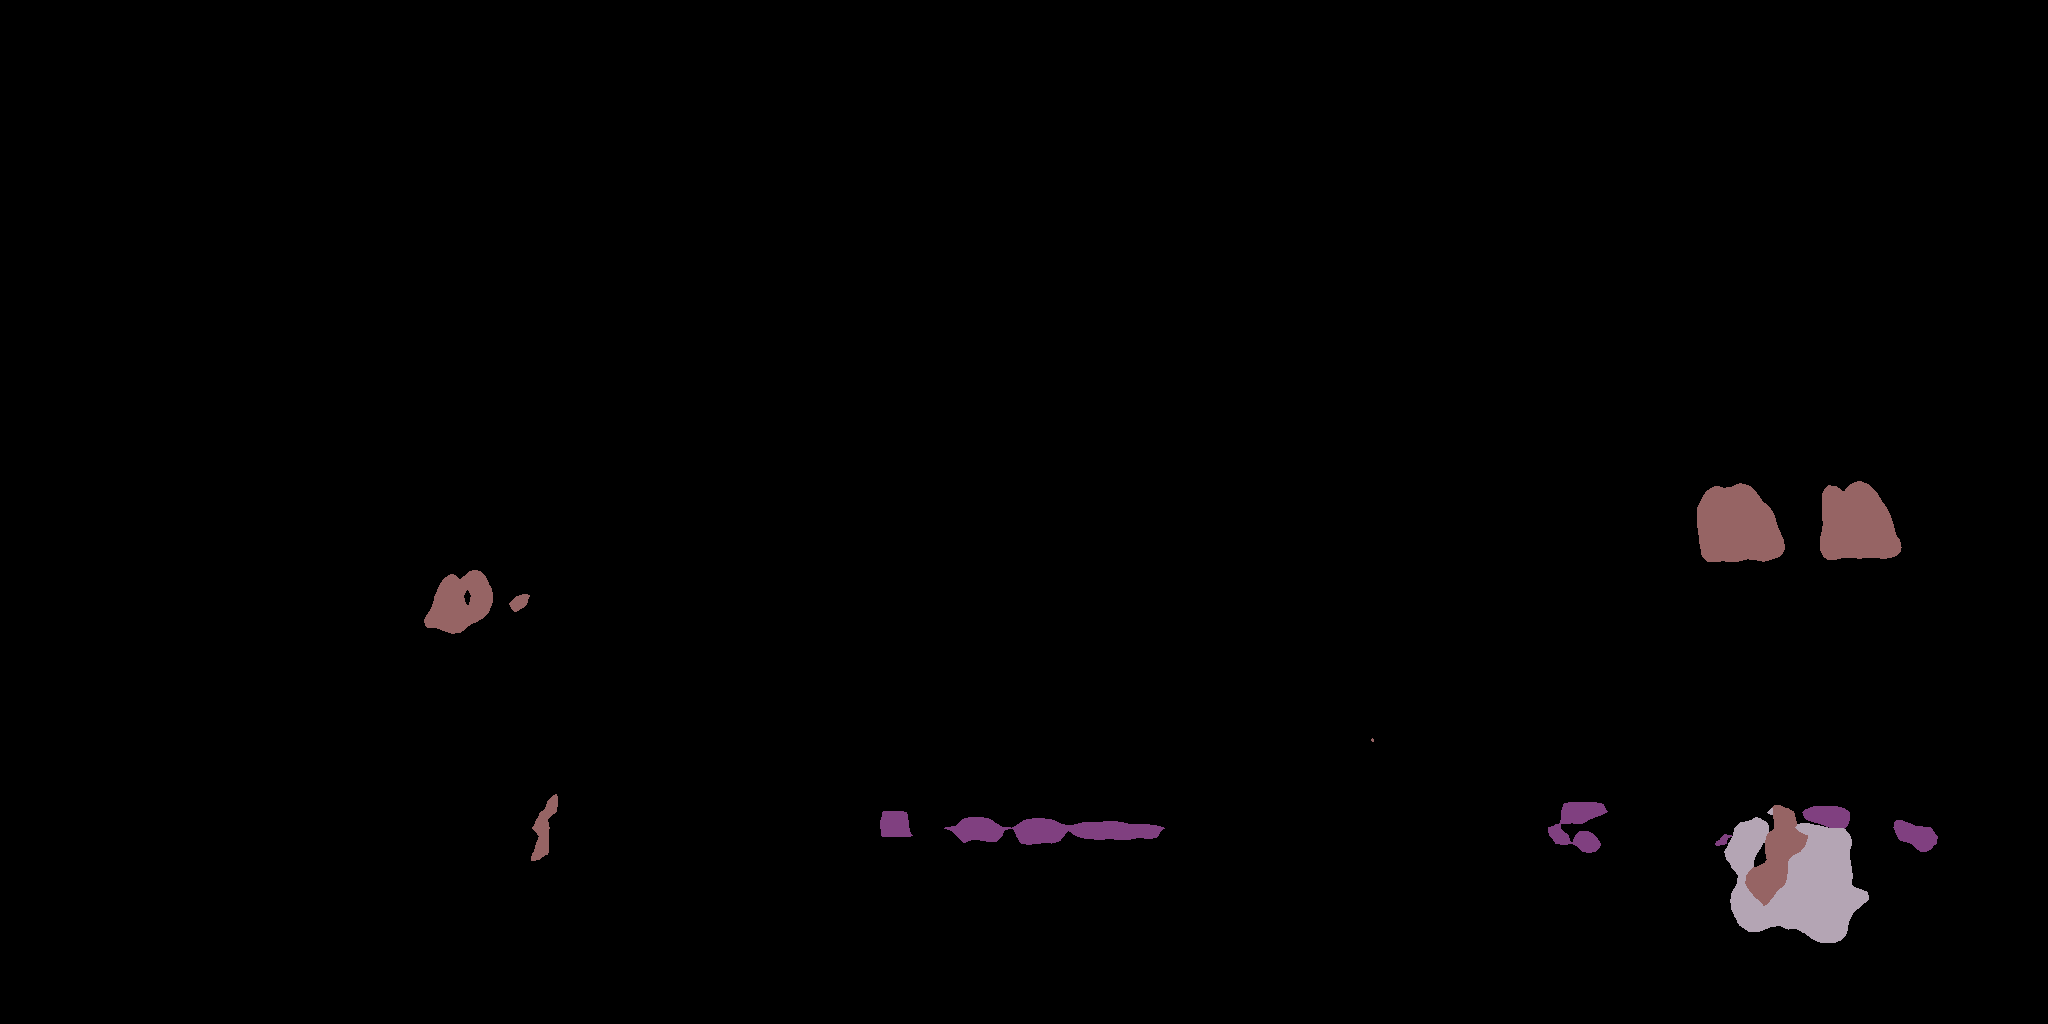

In [33]:
segmented_img_color

In [42]:
import torch
from torch import nn
import numpy as np
from PIL import Image
from transformers import SegformerFeatureExtractor, SegformerForSemanticSegmentation
import requests


def label_to_color_image(label_image):
    labels = create_cityscapes_label_colormap()
    color_image = np.zeros((label_image.shape[0], label_image.shape[1], 3), dtype=np.uint8)
    for label in labels:
        color_image[label_image == label.trainId] = label.color
    return color_image

def segment_image(image, model, feature_extractor):
    inputs = feature_extractor(images=image, return_tensors="pt")
    outputs = model(**inputs)
    logits = outputs.logits
    upsampled_logits = nn.functional.interpolate(logits,
                    size=inputs["pixel_values"].shape[-2:], # (height, width)
                    mode='bilinear',
                    align_corners=False)
    segmented_image = upsampled_logits.argmax(dim=1)[0].numpy()
    return segmented_image

def main():
    model = SegformerForSemanticSegmentation.from_pretrained("nvidia/segformer-b0-finetuned-cityscapes-512-1024")
    feature_extractor = SegformerFeatureExtractor.from_pretrained("nvidia/segformer-b0-finetuned-cityscapes-512-1024")

    image_path = 'data/external/svi_examples/365237318245343.jpg'
    image = Image.open(image_path).resize((2048, 1024))

    segmented_img = segment_image(image, model, feature_extractor)
    segmented_img_color = Image.fromarray(label_to_color_image(segmented_img), 'RGB')
    segmented_img_color = segmented_img_color.resize((2048, 1024), Image.NEAREST)
    # segmented_img_color = segmented_img_color.convert('RGBA')

    alpha = 0.5
    overlay = overlay_images(image, segmented_img_color, alpha)
    # save the image
    overlay.save('data/external/svi_examples/365237318245343_segformer.jpg')

if __name__ == '__main__':
    main()


/Users/koichiito/opt/anaconda3/envs/vis_review/lib/python3.8/site-packages/transformers/models/segformer/feature_extraction_segformer.py:28: FutureWarning: The class SegformerFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use SegformerImageProcessor instead.
  warnings.warn(
/Users/koichiito/opt/anaconda3/envs/vis_review/lib/python3.8/site-packages/transformers/models/segformer/image_processing_segformer.py:102: FutureWarning: The `reduce_labels` parameter is deprecated and will be removed in a future version. Please use `do_reduce_labels` instead.
  warnings.warn(
